In [7]:
import os
import kagglehub
import os
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import shutil
from collections import OrderedDict

In [8]:
# # Загрузка датасета
path = kagglehub.dataset_download("darshanthakare/dog-breeds-image-dataset")
print("Path to dataset files:", path)

100%|██████████| 753M/753M [01:14<00:00, 10.6MB/s] 

Extracting files...


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\darshanthakare\dog-breeds-image-dataset\versions\1


## EDA-анализ для датасета

#### 1. Базовая статистика

In [10]:
dataset_path = r"C:\Users\User\.cache\kagglehub\datasets\darshanthakare\dog-breeds-image-dataset\versions\1\Dog Breeds Image Dataset"

image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
total_images = 0  # Общее количество изображений
total_breeds = 0  # Общее количество пород
images_per_breed = defaultdict(int)  # Количество изображений по каждой породе

# Получаем список папок с породами (первого уровня)
breed_folders = [f for f in os.listdir(dataset_path) 
                if os.path.isdir(os.path.join(dataset_path, f))]
total_breeds = len(breed_folders)

# Подсчёт изображений
for breed_folder in breed_folders:
    breed_path = os.path.join(dataset_path, breed_folder)
    for file in os.listdir(breed_path):
        if Path(file).suffix.lower() in image_extensions:
            total_images += 1
            images_per_breed[breed_folder] += 1

# Вывод результатов
print(f"Всего пород: {total_breeds}")
print(f"Всего изображений: {total_images}")
print("\nКоличество изображений по породам:")
for breed, count in images_per_breed.items():
    print(f"- {breed}: {count} изображений")

Всего пород: 157
Всего изображений: 17498

Количество изображений по породам:
- affenpinscher: 134 изображений
- afghan_hound: 125 изображений
- african: 169 изображений
- airedale: 189 изображений
- akita: 7 изображений
- american_terrier: 153 изображений
- appenzeller: 135 изображений
- australian_cattledog: 18 изображений
- australian_terrier: 181 изображений
- basenji: 170 изображений
- basset_hound: 149 изображений
- beagle: 172 изображений
- bedlington_terrier: 148 изображений
- bernese_mountain: 190 изображений
- bichon_frise: 11 изображений
- blenheim_spaniel: 157 изображений
- blood_hound: 135 изображений
- bluetick: 147 изображений
- border_collie: 155 изображений
- border_terrier: 147 изображений
- borzoi: 107 изображений
- boston_bulldog: 173 изображений
- bouvier: 119 изображений
- boxer: 149 изображений
- brabancon: 141 изображений
- briard: 136 изображений
- brittany_spaniel: 136 изображений
- bull_mastiff: 137 изображений
- cairn_terrier: 177 изображений
- cardigan_corg

#### 2. Анализ распределения классов

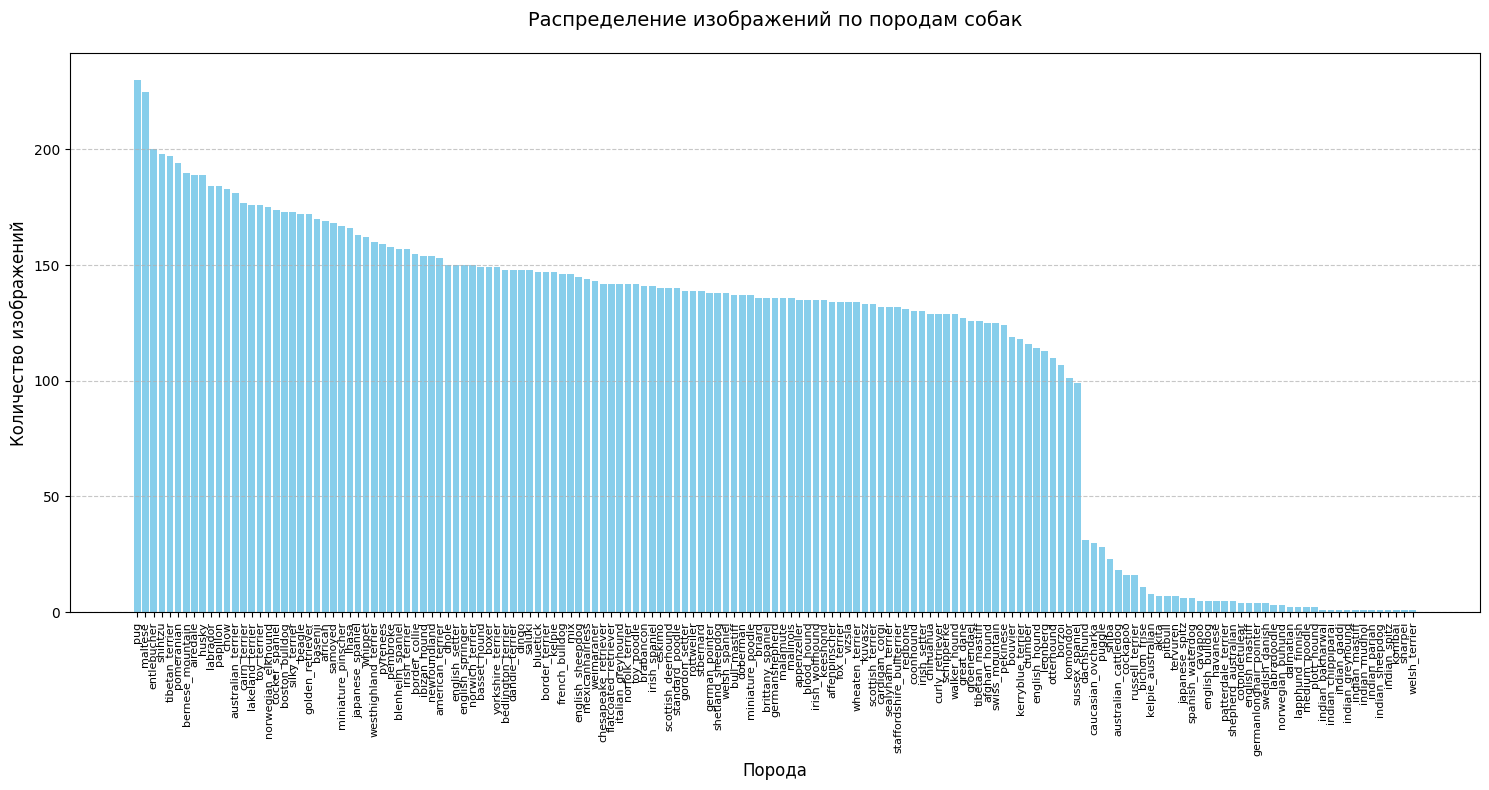

In [11]:
# Сортируем словарь images_per_breed по количеству изображений
sorted_breeds = OrderedDict(sorted(images_per_breed.items(), 
                               key=lambda x: x[1], 
                               reverse=True))

breeds = list(sorted_breeds.keys())
counts = list(sorted_breeds.values())

plt.figure(figsize=(15, 8))
bars = plt.bar(breeds, counts, color='skyblue')
plt.title(f'Распределение изображений по породам собак', 
          fontsize=14, pad=20)
plt.xlabel('Порода', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Проанализировав график, я решила удалить из датасета папки, в которызх меньше 100 изображений

#### 3. Обработка датасета

In [13]:
# Количество пород, которые стоит удалить
low_count_folders = {folder: count for folder, count in images_per_breed.items() if count < 100}

def count_images(folder):
    """Считает количество изображений в папке"""
    extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif'}
    return len([f for f in os.listdir(folder) if Path(f).suffix.lower() in extensions])

def delete_folders_with_few_images(root_path, min_images=100):
    """Удаляет конечные папки с количеством изображений меньше min_images"""
    deleted = []
    errors = []
    
    # Проходим по всем конечным папкам
    for folder in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            try:
                img_count = count_images(folder_path)
                if img_count < min_images:
                    shutil.rmtree(folder_path)
                    deleted.append((folder, img_count))
                    print(f"Удалено: {folder} ({img_count} изображений)")
            except Exception as e:
                errors.append(f"Ошибка в {folder}: {str(e)}")
    
    # Вывод результатов
    print(f"\nИтого: удалено {len(deleted)} папок")

delete_folders_with_few_images(dataset_path)

Удалено: akita (7 изображений)
Удалено: australian_cattledog (18 изображений)
Удалено: bichon_frise (11 изображений)
Удалено: caucasian_ovcharka (30 изображений)
Удалено: cavapoo (5 изображений)
Удалено: cockapoo (16 изображений)
Удалено: cotondetulear (4 изображений)
Удалено: dachshund (31 изображений)
Удалено: dalmatian (2 изображений)
Удалено: english_bulldog (5 изображений)
Удалено: english_mastiff (4 изображений)
Удалено: germanlonghair_pointer (4 изображений)
Удалено: havanese (5 изображений)
Удалено: indian_bakharwal (1 изображений)
Удалено: indian_chippiparai (1 изображений)
Удалено: indian_gaddi (1 изображений)
Удалено: indian_greyhound (1 изображений)
Удалено: indian_mastiff (1 изображений)
Удалено: indian_mudhol (1 изображений)
Удалено: indian_pariah (1 изображений)
Удалено: indian_sheepdog (1 изображений)
Удалено: indian_spitz (1 изображений)
Удалено: japanese_spitz (6 изображений)
Удалено: kelpie_australian (8 изображений)
Удалено: kombai (1 изображений)
Удалено: labradood

Проверка удалены ли папки

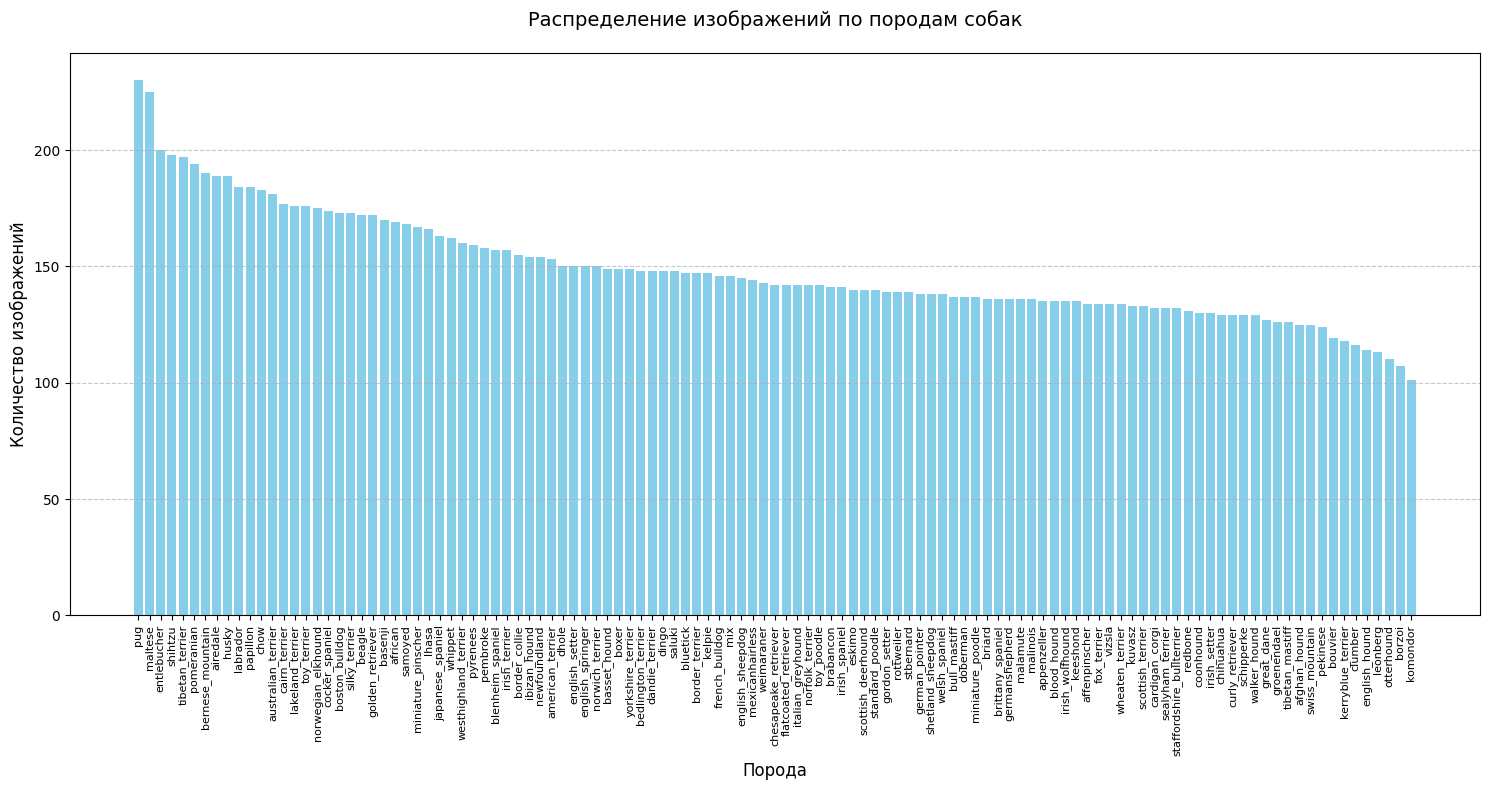

In [16]:
remaining_breeds = [f for f in os.listdir(dataset_path) 
                   if os.path.isdir(os.path.join(dataset_path, f))]

# Подсчет изображений для оставшихся пород
images_per_remaining_breed = defaultdict(int)
for breed in remaining_breeds:
    breed_path = os.path.join(dataset_path, breed)
    images = [f for f in os.listdir(breed_path) 
             if Path(f).suffix.lower() in image_extensions]
    images_per_remaining_breed[breed] = len(images)

# 4. Подготовка данных для графика
sorted_breeds = sorted(images_per_remaining_breed.items(), 
                      key=lambda x: x[1], 
                      reverse=True)
breeds = [x[0] for x in sorted_breeds]
counts = [x[1] for x in sorted_breeds]


plt.figure(figsize=(15, 8))
bars = plt.bar(breeds, counts, color='skyblue')
plt.title(f'Распределение изображений по породам собак', 
          fontsize=14, pad=20)
plt.xlabel('Порода', fontsize=12)
plt.ylabel('Количество изображений', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Датасет полностью проанализирован и обработан. Теперь можно приступать к этапу обучения моделей детекции и классификации